# Imports

In [1374]:
from jikanpy import Jikan
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

# Initialisierung und Methoden bereitstellen

In [1377]:
#Jikan-Client
jikan = Jikan()

anime_bar_col = "#285de0"
manga_bar_col = "#ff5e00"

top_animes = []
top_mangas = []
top_characters = []

num_pages = 10

# TOP Animes aus mehreren Seiten
# default 25 pro Page
def popularAnimes(page):
    for page in range(1, page + 1):
        top_animes.extend(jikan.top(type='anime', page=page)['data'])
        if page % 2 == 0:
            time.sleep(2)
            
# TOP Mangas aus mehreren Seiten
# default 25 pro Page
def popularMangas(page):
    for page in range(1, page + 1):
        top_mangas.extend(jikan.top(type='manga', page=page)['data'])
        if page % 2 == 0:
            time.sleep(2)

# Top 10 Charaktere
def popularCharacters():
    time.sleep(2)
    top_characters.extend(jikan.top(type='characters', page=1)['data'][:10])  

# Get Genre
def getGenre(data):
    genre_data = []
    for index in data:
        for genre in index['genres']:
            genre_data.append(genre['name'])
    return genre_data

# Text in der Bar darstellen
def addTextToBar(bars, titles, y_position , rotation, fontSize, color, info = "", aboveBar = False):
    if aboveBar:
        for i in range(len(bars)):
            bar = bars[i]
            plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + y_position, info + str(titles.iloc[i]), ha='center', rotation=rotation, fontsize=fontSize, zorder=30, color=color)
    else:
         for i in range(len(bars)):
            bar = bars[i]
            plt.text(bar.get_x() + bar.get_width() / 2, y_position, info + str(titles.iloc[i]), ha='center', rotation=rotation, fontsize=fontSize, zorder=30, color=color)


def init():
    popularAnimes(num_pages)
    popularMangas(num_pages)
    popularCharacters()

init()

print("TOP Animes amount: " + str(len(top_animes)))
print("TOP Mangas amount: " + str(len(top_animes)))
print("TOP Characters amount: " + str(len(top_characters)))

TOP Animes amount: 250
TOP Mangas amount: 250
TOP Characters amount: 10


***
# **Analyse 1:** 

### Sind Animes beliebter als Mangas?

### Hypothese: Animes sind warscheinlich beliebter

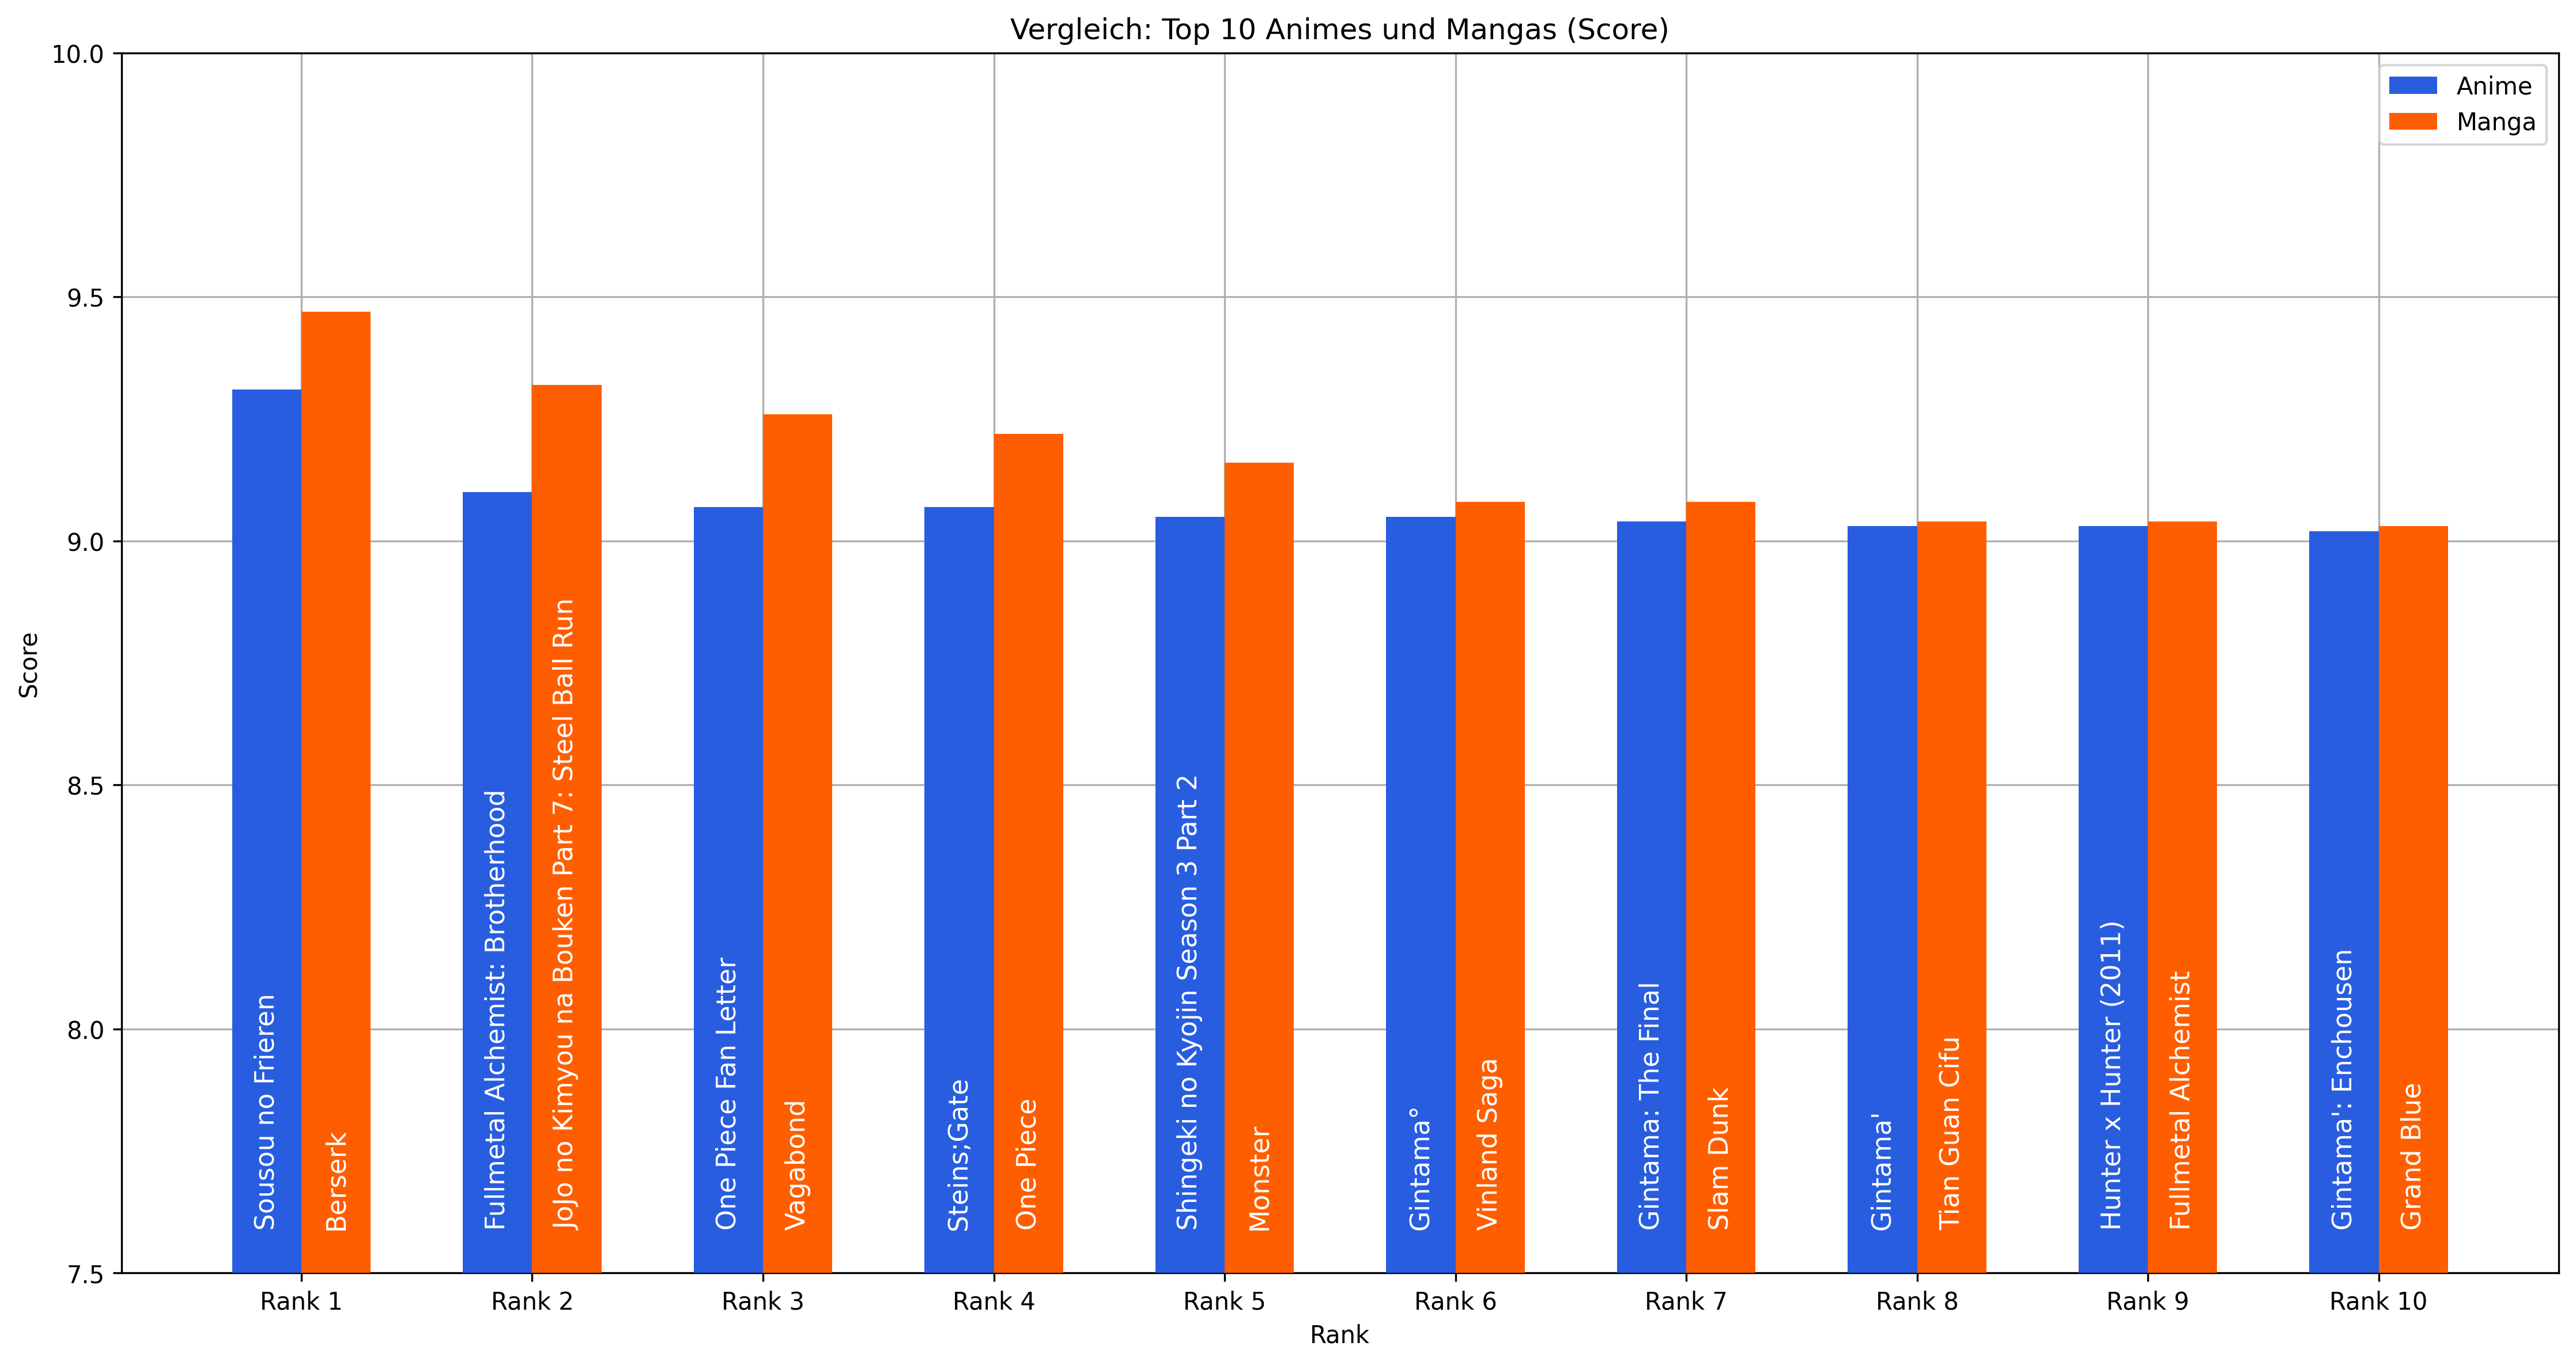

In [1396]:
top10_animes = top_animes[:10]
top10_mangas = top_mangas[:10]

anime_df = pd.DataFrame(top10_animes, columns=['title', 'score'])
manga_df = pd.DataFrame(top10_mangas, columns=['title', 'score'])

# Ranks hinzufügen
anime_df['Rank'] = range(1, 11)
manga_df['Rank'] = range(1, 11)

# DataFrames mergen
combined_df = pd.merge(anime_df, manga_df, on='Rank', how='outer')

bar_width = 0.3
plt.figure(figsize=(15, 8), dpi=300)
x_positions = combined_df['Rank']
# Anime Balken
bars_anime = plt.bar(x_positions - bar_width / 2, combined_df['score_x'], width=bar_width, color=anime_bar_col, label='Anime', zorder=10)

# Manga Balken
bars_manga = plt.bar(x_positions + bar_width / 2, combined_df['score_y'], width=bar_width, color=manga_bar_col, label='Manga', zorder=10)
     
addTextToBar(bars_anime,combined_df['title_x'],7.6, 90, 11, "white")
addTextToBar(bars_manga,combined_df['title_y'],7.6, 90, 11, "white")

    
plt.xticks(x_positions, [f"Rank {i}" for i in x_positions])
plt.ylim(7.5, 10)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Vergleich: Top 10 Animes und Mangas (Score)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### In diesem Diagramm ist zu erkennen, dass die aktuellen Top 10 Mangas leicht höhere Scores erzielen als die Top 10 Animes.

***

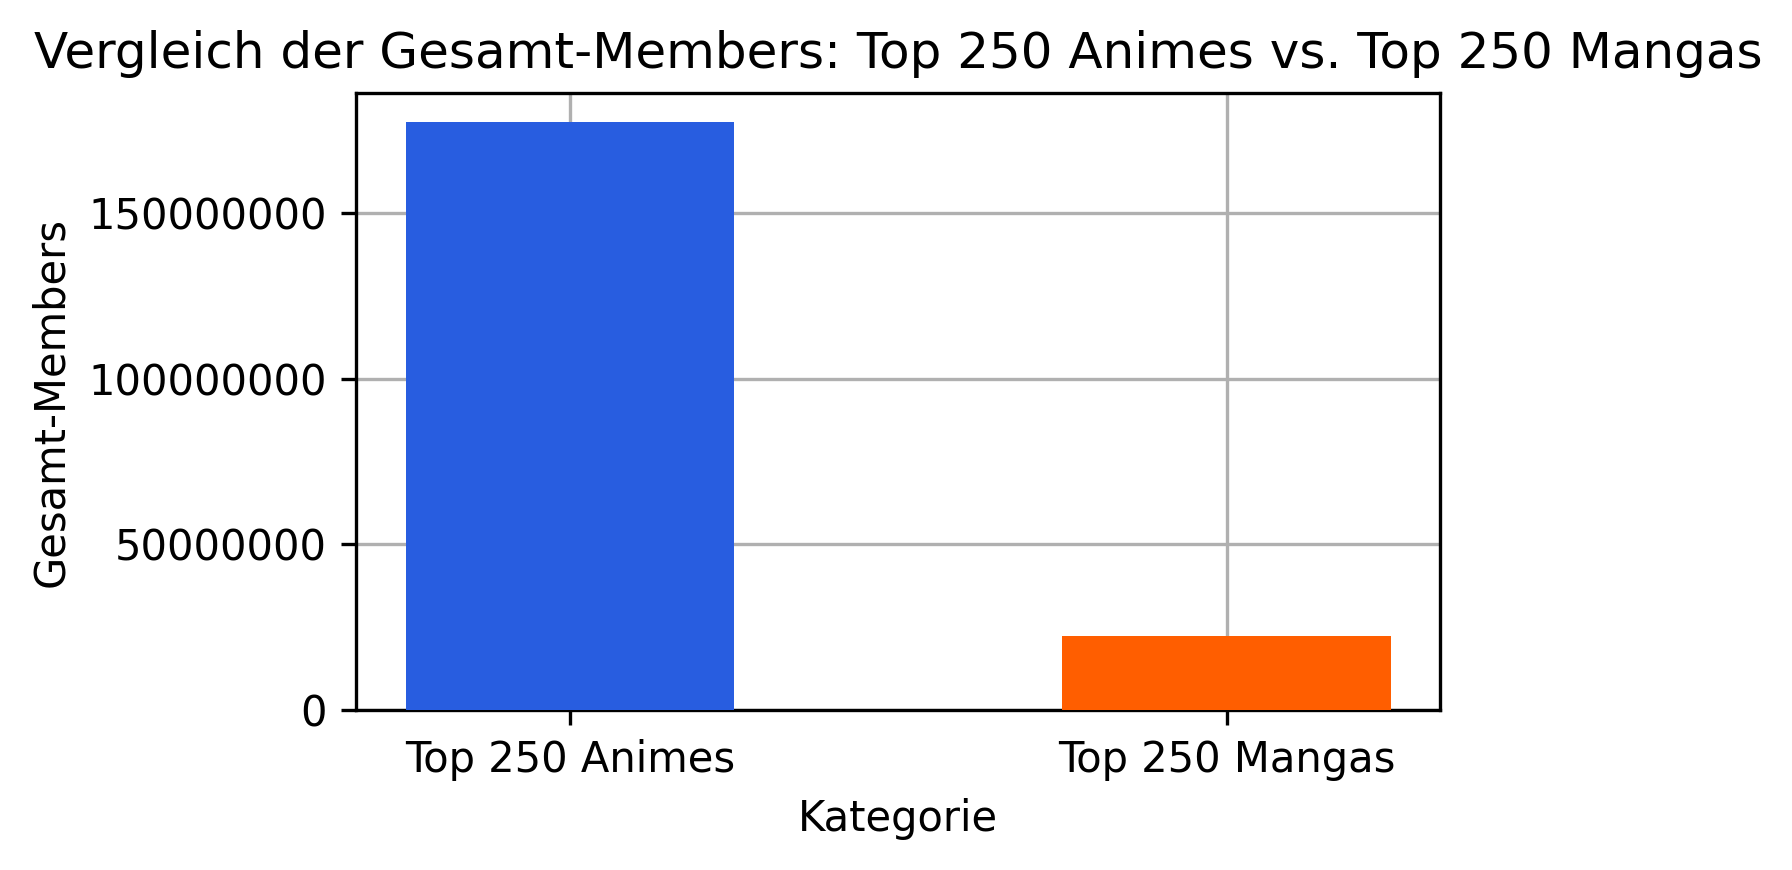

In [1398]:
anime_df = pd.DataFrame(top_animes, columns=['title', 'members'])
manga_df = pd.DataFrame(top_mangas, columns=['title', 'members'])


# Sum -> Gesamtscores
total_anime_members = anime_df['members'].sum()
total_manga_members = manga_df['members'].sum()


plt.figure(figsize=(5, 3), dpi=300)
plt.bar(['Top 250 Animes', 'Top 250 Mangas'], [total_anime_members, total_manga_members], color=[anime_bar_col, manga_bar_col], zorder=10,width= 0.5)
plt.xlabel('Kategorie')
plt.ylabel('Gesamt-Members')
plt.title('Vergleich der Gesamt-Members: Top 250 Animes vs. Top 250 Mangas')
plt.ticklabel_format(style='plain', axis='y')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Wenn man jedoch die Mitgliederzahlen der Top 250 Animes und Mangas vergleicht, zeigt sich deutlich, dass Animes viel häufiger in den Listen der Nutzer erscheinen. Daraus lässt sich schließen, dass Animes insgesamt deutlich beliebter sind.

### **Schlussfolgerung:**
#### Obwohl Mangas in den Top 10 einen besseren Score haben, zeigt sich insgesamt, dass Animes deutlich beliebter sind. Somit wird die Hypothese bestätigt.

***
# **Analyse 2:** 

### Beliebte Genres zwischen Animes und Mangas vergleichen, gibt es unterschiede?

### Hypothese: Die beliebtheit der Genres wird unterschiedlich sein

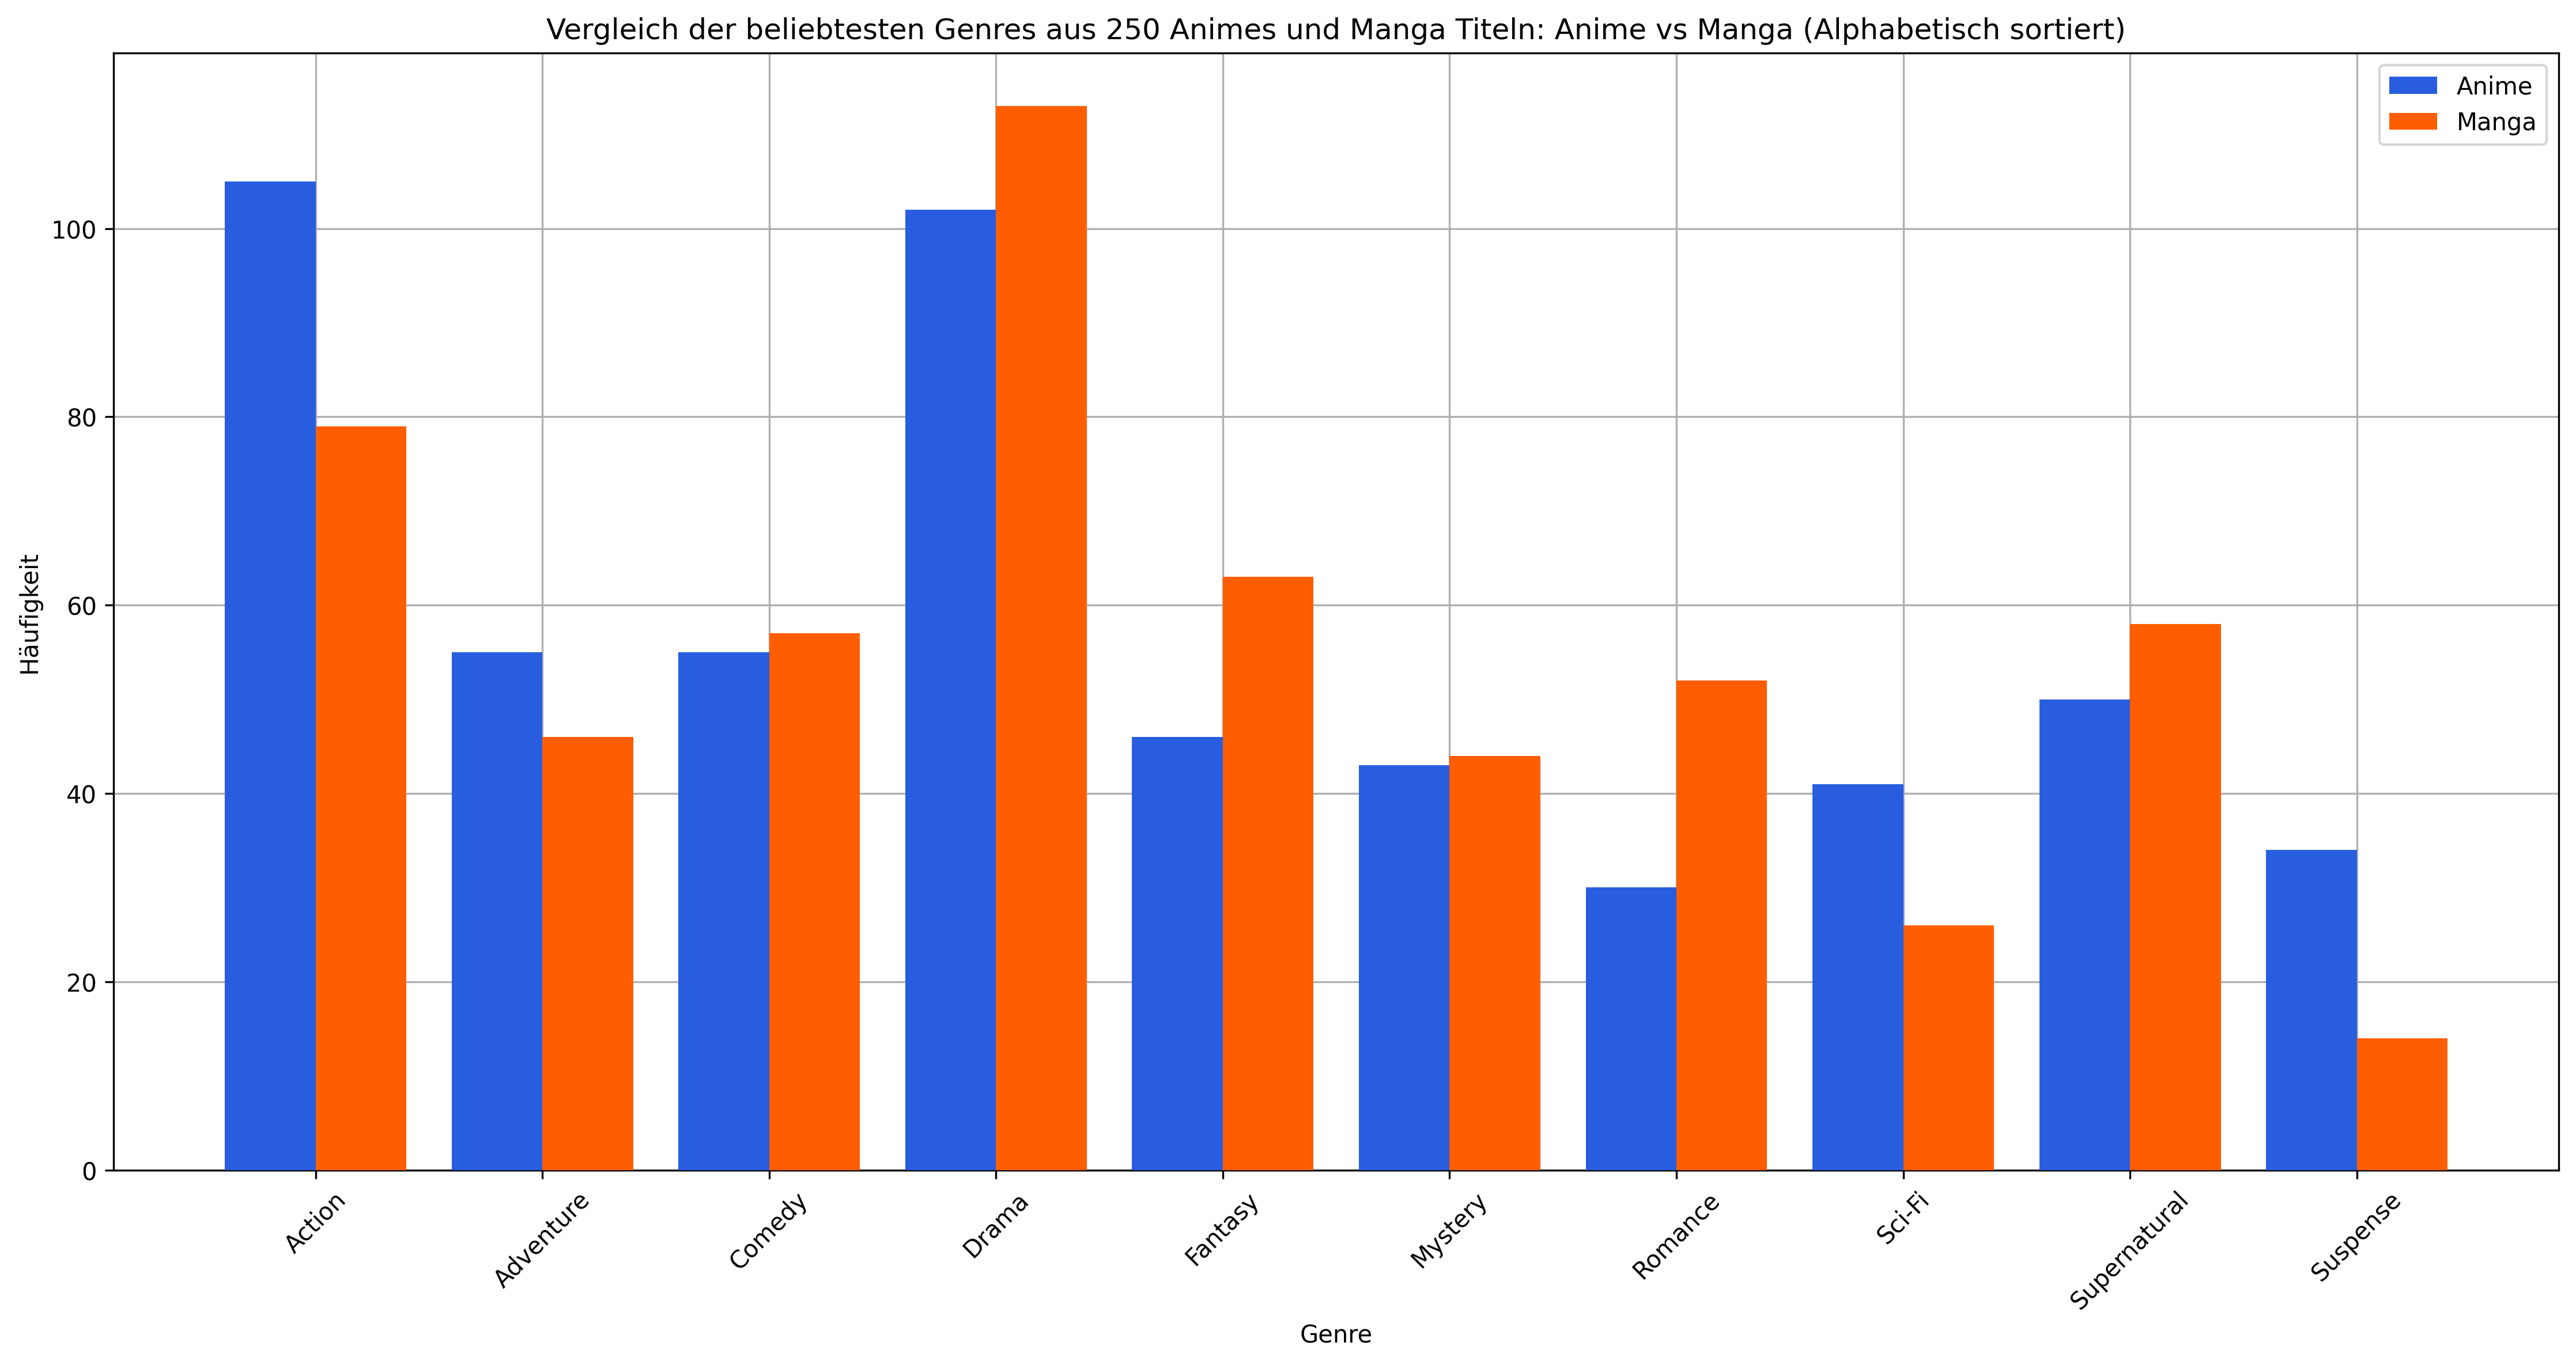

In [1400]:
# Genres aus oberen Daten
anime_genre_data = getGenre(top_animes)
manga_genre_data = getGenre(top_mangas)

anime_genre_counts = pd.Series(anime_genre_data).value_counts()
manga_genre_counts = pd.Series(manga_genre_data).value_counts()

common_genres = anime_genre_counts.index.intersection(manga_genre_counts.index)[:10] # Genres müssen in beiden existieren

genre_comparison_df = pd.DataFrame({
    'Anime': anime_genre_counts[common_genres],
    'Manga': manga_genre_counts[common_genres]
})

genre_comparison_df = genre_comparison_df.sort_index()

bar_width = 0.4
    
plt.figure(figsize=(15, 8), dpi=300)
x_positions = np.arange(len(genre_comparison_df))

# Anime Genres als Balken
plt.bar(x_positions - bar_width / 2, genre_comparison_df['Anime'], width=bar_width, color=anime_bar_col, label='Anime', zorder=10)

# Manga Genres als Balken
plt.bar(x_positions + bar_width / 2, genre_comparison_df['Manga'], width=bar_width, color=manga_bar_col, label='Manga', zorder=10)
plt.xlabel('Genre')
plt.ylabel('Häufigkeit')
plt.title('Vergleich der beliebtesten Genres aus 250 Animes und Manga Titeln: Anime vs Manga (Alphabetisch sortiert)')
plt.xticks(x_positions, genre_comparison_df.index, rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### **Schlussfolgerung:**
#### Die Ergebnisse zeigen klar, dass sich die Beliebtheit der Genres bei Anime und Manga unterscheidet. Damit wird die Hypothese bestätigt.

***
# **Analyse 3:** 

### Sind Animes mit weniger Episodenanzahl beliebter? Vergleiche die TOP 250 Animes
### Hypothese: Animes mit weniger Episodenanzahl sind warscheinlich beliebter

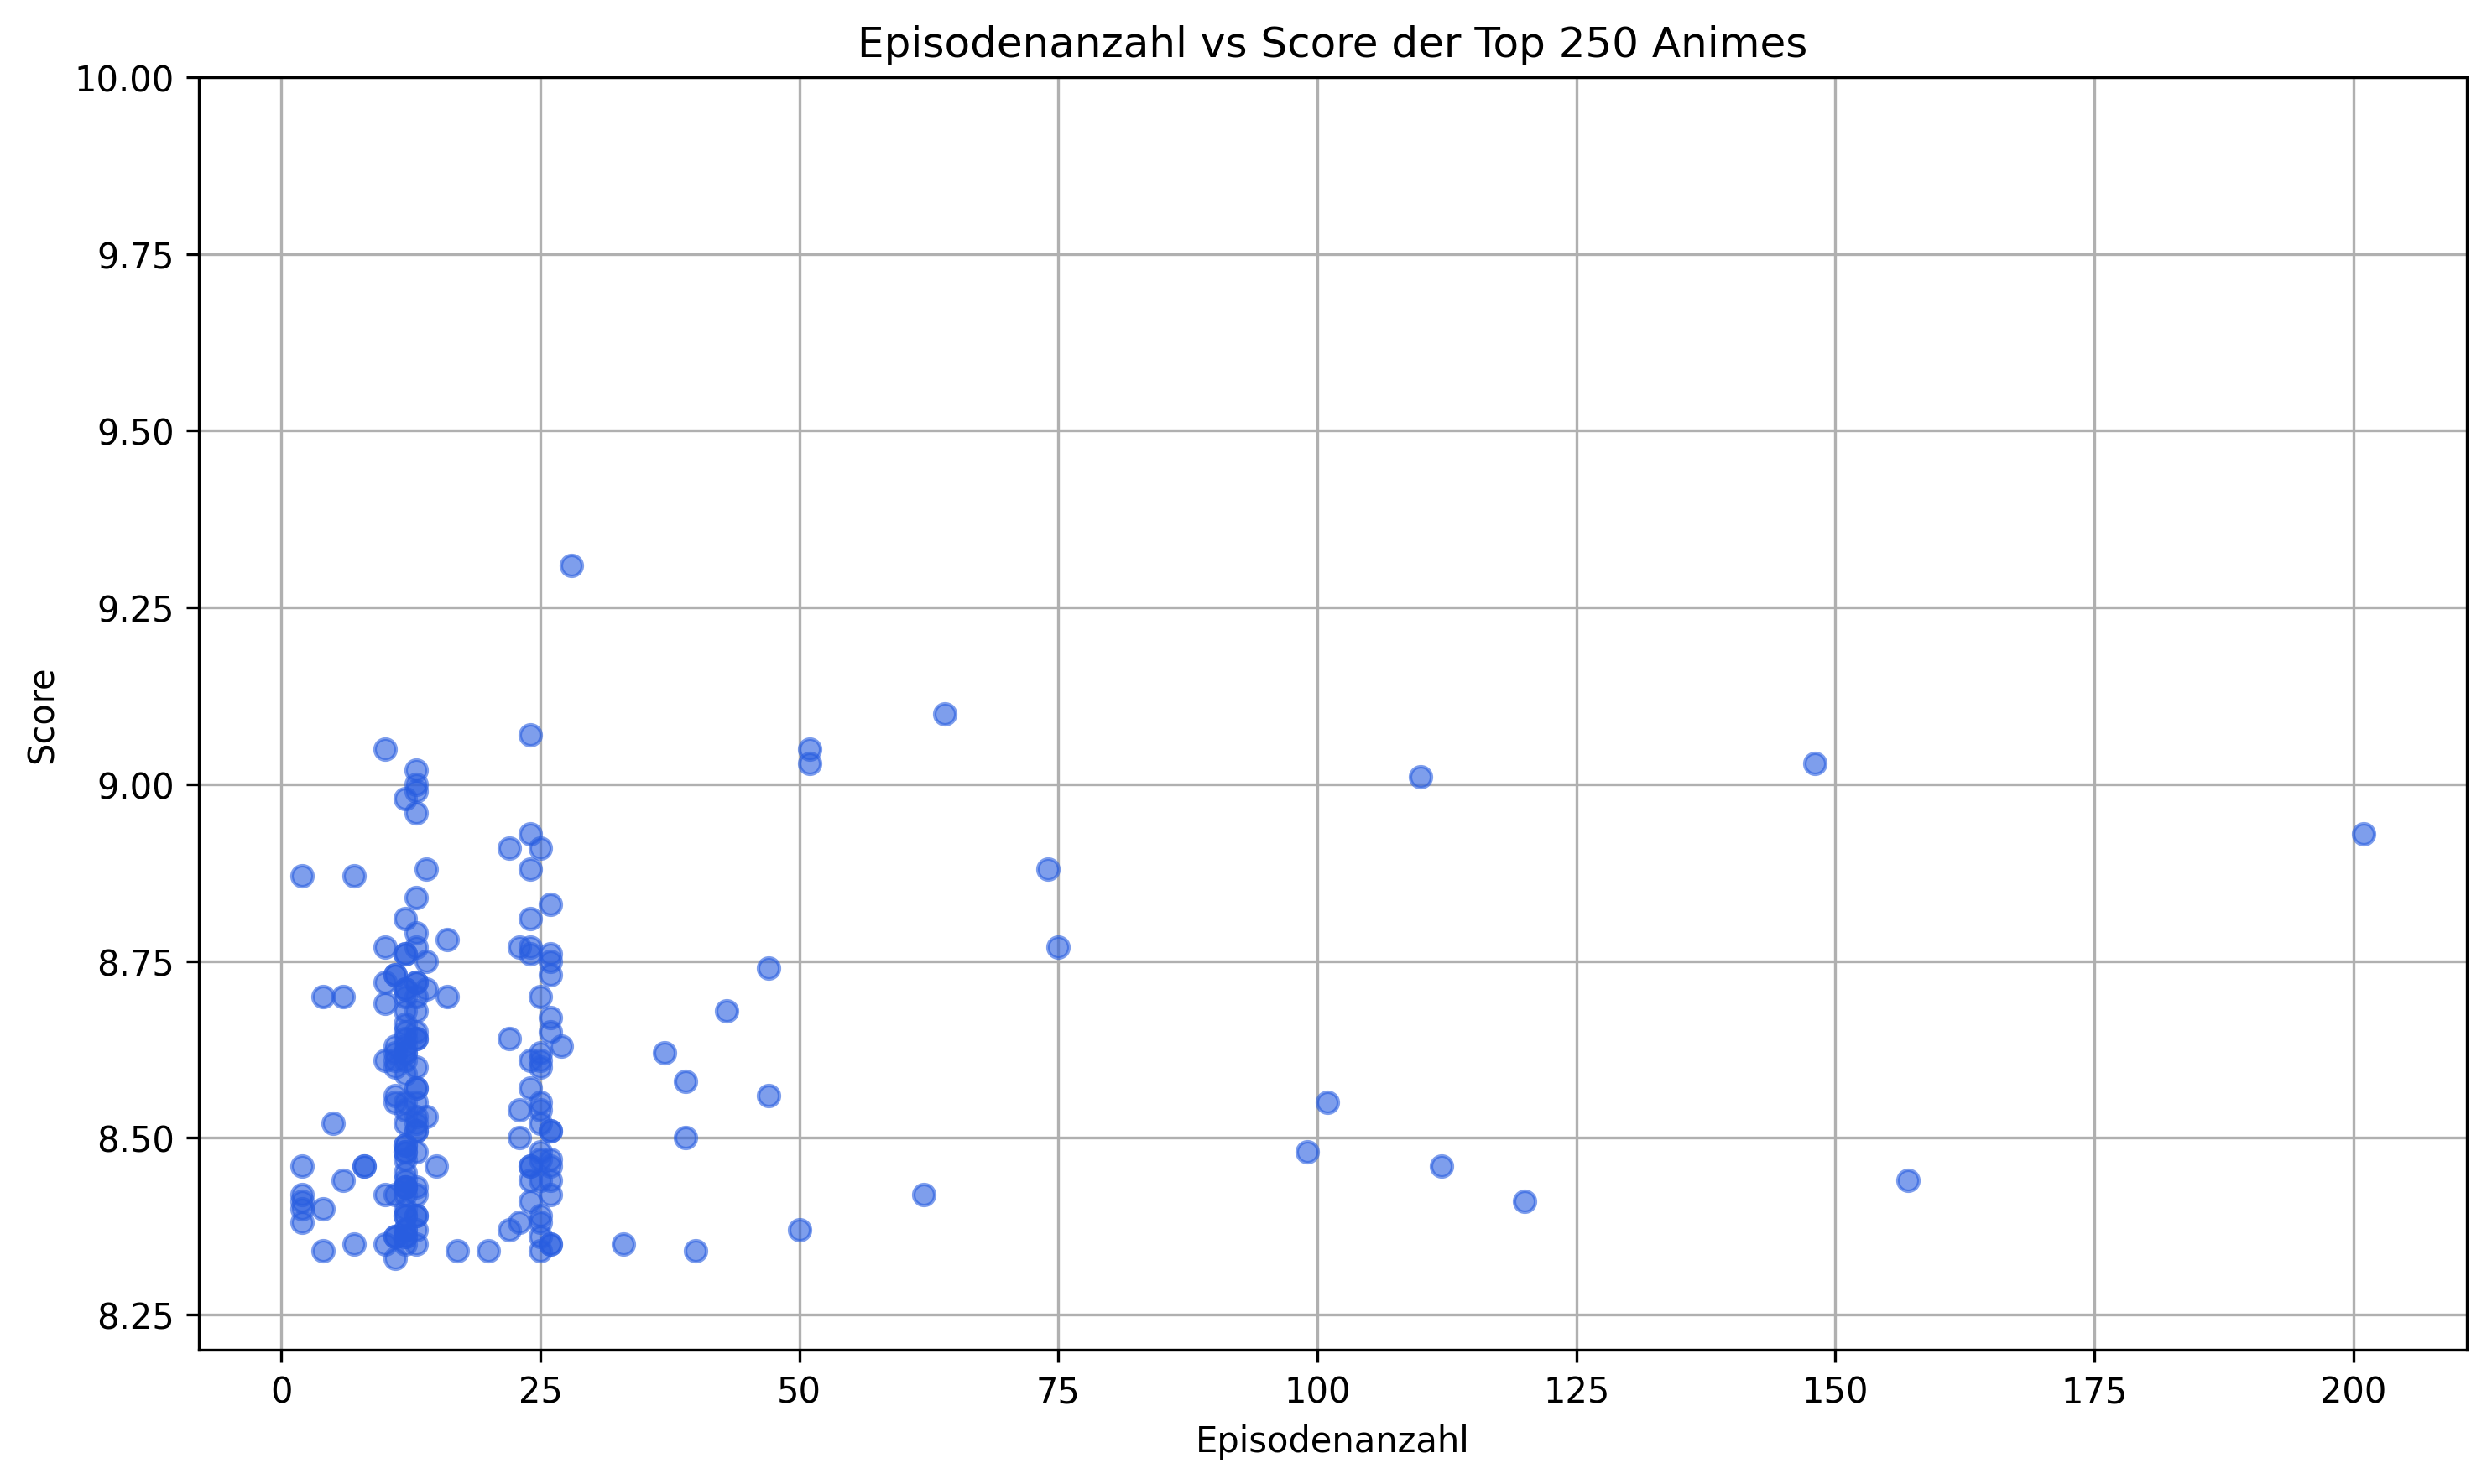

In [1402]:
# Liste für Episoden und Scores
episode_counts = []
score_counts = []
anime_name = []

for anime in top_animes:
    episode_counts.append(anime['episodes'])
    score_counts.append(anime['score'])
    anime_name.append(anime['title'])

# Panda DF erstellen
anime_data = pd.DataFrame({
    'Title': anime_name,
    'Episoden': episode_counts,
    'Score': score_counts
})

anime_data = anime_data.query("Episoden > 1") # Animes mit 1 Episode = Movies, daher beachte ich Sie nicht

# Scatterplot mit df 
plt.figure(figsize=(10, 6),dpi=300)
plt.scatter(anime_data['Episoden'], anime_data['Score'], color=anime_bar_col, alpha=0.6, zorder = 10)
plt.xlabel('Episodenanzahl')
plt.ylabel('Score')
plt.ylim(8.2, 10)
plt.title('Episodenanzahl vs Score der Top 250 Animes')
plt.grid(True)
plt.tight_layout()
plt.show()

### **Schlussfolgerung:**
#### Die Analyse zeigt, dass Animes mit weniger Episoden (1-25) tendenziell beliebter sind.

***
# **Analyse 4 (Webscraping):** 

### TOP Anime Charaktere mit Score vergleichen? 

### Hypothese: Die beliebtesten Charaktere sind nicht zwangsläufig in den Animes mit den besten Bewertungen zu finden

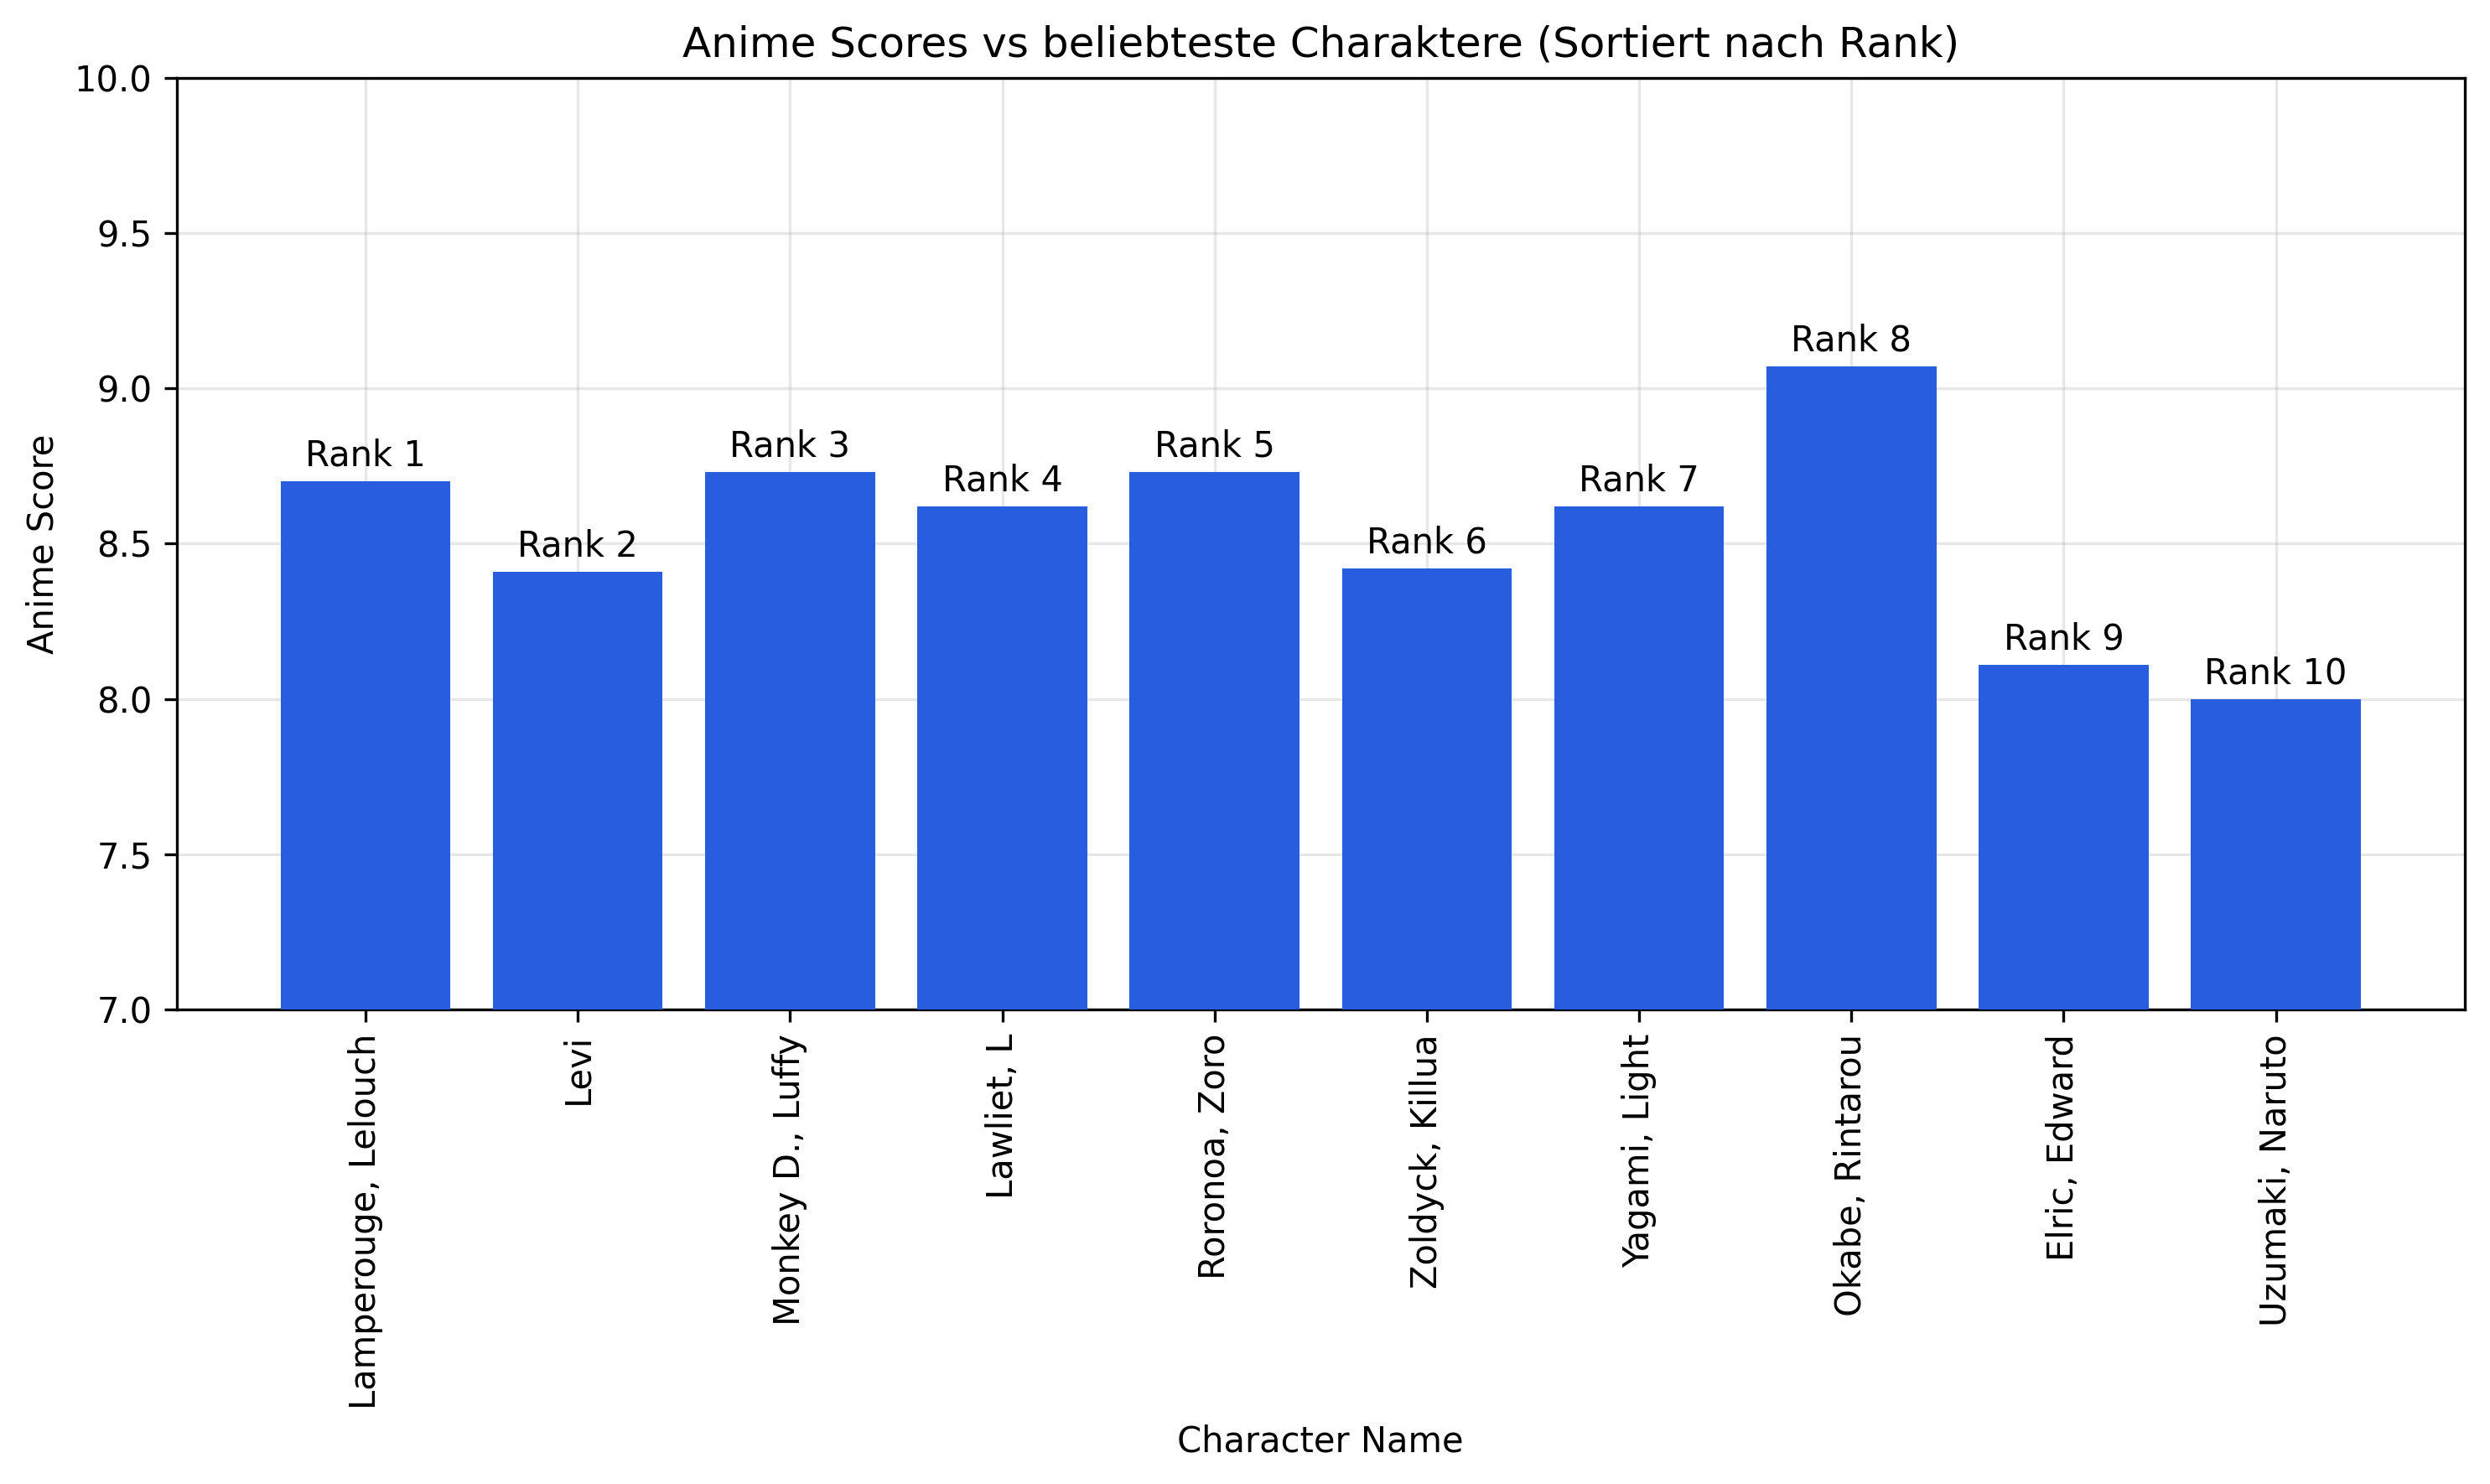

In [1404]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

# URL für TOP Charaktere
url = 'https://myanimelist.net/character.php'

response = requests.get(url)
html_content = response.text
soup = BeautifulSoup(html_content, 'html.parser')

# Daten für Charaktere in der Tabelle
ranking_rows = soup.find_all('tr', class_='ranking-list')

ranks = []
names = []
favorites = []
anime_links = []
anime_score = []

# Nur 10 Einträge (TOP 10)
for rank in range(10):
    row = ranking_rows[rank]
    
    # Rank des Charakters (Beliebtheit)
    rank_value = row.find('span', class_='pepole-rank-text').text
    ranks.append(rank_value)
    
    # Name des Charakters
    character_name = row.find('a', class_='fs14').text
    names.append(character_name)
    
    # Anzahl der Favoriten (wirkt sich auf die beliebtheit aus)
    favorite_count = row.find('td', class_='favorites').text
    favorites.append(favorite_count)
    
    # Zugehöriger Anime
    anime_tag = row.find('td', class_='animeography').find('a')
    anime_links.append(anime_tag['href'])
    
    # Score vom zugehörigem Anime
    url = anime_tag['href']
    response = requests.get(url)
    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')
    score = soup.find('div', class_='score-label').text
    anime_score.append(float(score))

# Df erstellen
data = {
    'Rank': ranks,
    'Name': names,
    'Favorites': favorites,
    'Anime Link': anime_links,
    'Anime Score': anime_score
}

df = pd.DataFrame(data)
#print(df)


plt.figure(figsize=(10, 6),dpi=300)

bars = plt.bar(df['Name'], df['Anime Score'], color=anime_bar_col, zorder=10)

addTextToBar(bars, df['Rank'] , 0.05 , 0, 10, "black", "Rank ", True)

plt.xlabel('Character Name')
plt.ylabel('Anime Score')
plt.ylim(7, 10)
plt.title('Anime Scores vs beliebteste Charaktere (Sortiert nach Rank)')
plt.xticks(rotation=90)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


### **Schlussfolgerung:**
#### Wie man sieht, hat der Anime des beliebtesten Charakters (Lelouch vi Britannia) einen Score von nur 8.7, während der Anime des achtbeliebtesten Charakters (Okabe Rintarou) mit 9.07 besser abschneidet.

#### Die Gründe dafür sind unterschiedlich, oft hängt es jedoch mit dem Verlauf des Animes zusammen. Ein schlechtes Ende oder andere unglückliche Entscheidungen, wie der Wechsel von handgezeichneten Animationen zu CGI, können den Gesamteindruck und damit die Bewertung negativ beeinflussen.